In [72]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from biokit.viz import corrplot
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 145
matplotlib.rcParams['figure.figsize'] = (8,6)
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
df=pd.read_csv('studiu_caz_socuri.csv', delimiter=',') 
pd.set_option('display.max_columns', None)
df.columns

Index(['id', 'TIME', 'MPU69W', 'MPU69X', 'MPU69Y', 'MPU69Z', 'MPU68W',
       'MPU68X', 'MPU68Y', 'MPU68Z', 'MPU69ACC_X', 'MPU69ACCY', 'MPU69ACCZ',
       'MPU68ACCX', 'MPU68ACCY', 'MPU68ACCZ', 'MPU69T', 'MPU69U', 'MPU68T',
       'MPU68U', 'VIBRATII', 'CazWW', 'CazXX', 'CazYY', 'CazZZ', 'CazACCXX',
       'CazACCYY', 'CazACCZZ'],
      dtype='object')

In [46]:
df.tail(2)

,id,TIME,MPU69W,MPU69X,MPU69Y,MPU69Z,MPU68W,MPU68X,MPU68Y,MPU68Z,MPU69ACC_X,MPU69ACCY,MPU69ACCZ,MPU68ACCX,MPU68ACCY,MPU68ACCZ,MPU69T,MPU69U,MPU68T,MPU68U,VIBRATII,CazWW,CazXX,CazYY,CazZZ,CazACCXX,CazACCYY,CazACCZZ
147800,147801,2019-12-21 12:14:52,-0.16,-0.72,-0.05,0.67,0.55,-0.45,-0.56,-0.42,-7441,3828,917,-9,15,67,24,14,22,17,0,-0.71,-0.27,0.51,1.09,-7432,3813,850
147801,147802,2019-12-21 12:14:52,-0.20,-0.63,-0.22,0.71,0.55,-0.45,-0.56,-0.42,-2880,-419,196,-13,4,67,24,15,22,17,0,-0.75,-0.18,0.34,1.13,-2867,-423,129


FEATURE ENGINEERING
https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/feature-engineering?ex=5

STANDARDIZATION https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/standardizing-data?ex=3

FEATURE SELECTION https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/selecting-features-for-modeling?ex=4

# III. Selecting relevant features

# I. FIND CORRELATION

In [47]:
def get_corrs(df):
    col_correlations = df.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

my_corrs = get_corrs(df)
# and the following line to retrieve the single correlation
#print(my_corrs[('VIBRATII', 'MPU69Z')])
print(my_corrs)

{('id', 'id'): 0.0, ('id', 'MPU69W'): 0.0, ('id', 'MPU69X'): 0.0, ('id', 'MPU69Y'): 0.0, ('id', 'MPU69Z'): 0.0, ('id', 'MPU68W'): 0.0, ('id', 'MPU68X'): 0.0, ('id', 'MPU68Y'): 0.0, ('id', 'MPU68Z'): 0.0, ('id', 'MPU69ACC_X'): 0.0, ('id', 'MPU69ACCY'): 0.0, ('id', 'MPU69ACCZ'): 0.0, ('id', 'MPU68ACCX'): 0.0, ('id', 'MPU68ACCY'): 0.0, ('id', 'MPU68ACCZ'): 0.0, ('id', 'MPU69T'): 0.0, ('id', 'MPU69U'): 0.0, ('id', 'MPU68T'): 0.0, ('id', 'MPU68U'): 0.0, ('id', 'VIBRATII'): 0.0, ('id', 'CazWW'): 0.0, ('id', 'CazXX'): 0.0, ('id', 'CazYY'): 0.0, ('id', 'CazZZ'): 0.0, ('id', 'CazACCXX'): 0.0, ('id', 'CazACCYY'): 0.0, ('id', 'CazACCZZ'): 0.0, ('MPU69W', 'id'): 0.018695737380610346, ('MPU69W', 'MPU69W'): 0.0, ('MPU69W', 'MPU69X'): 0.0, ('MPU69W', 'MPU69Y'): 0.0, ('MPU69W', 'MPU69Z'): 0.0, ('MPU69W', 'MPU68W'): 0.0, ('MPU69W', 'MPU68X'): 0.0, ('MPU69W', 'MPU68Y'): 0.0, ('MPU69W', 'MPU68Z'): 0.0, ('MPU69W', 'MPU69ACC_X'): 0.0, ('MPU69W', 'MPU69ACCY'): 0.0, ('MPU69W', 'MPU69ACCZ'): 0.0, ('MPU69W', '

In [48]:
from scipy.stats.stats import pearsonr
docs_col = df['VIBRATII'].values
energy_col = df['MPU69Z'].values
corr , _ = pearsonr(docs_col, energy_col)
print(corr)

-0.002040256905743339


In [69]:
# Print out the column correlations of the wine dataset
df=date.drop(['id','TIME','MPU68W','MPU68X','MPU68Y', 'MPU68Z','MPU68ACCX','MPU68ACCY','MPU68ACCZ','MPU69T','MPU69U','MPU68T','MPU68U','CazWW','CazXX','CazYY','CazZZ', 'CazACCXX','CazACCYY','CazACCZZ'], axis=1)
print(df.corr())

              MPU69W    MPU69X    MPU69Y    MPU69Z  MPU69ACC_X  MPU69ACCY  \
MPU69W      1.000000  0.014586  0.126837 -0.006039   -0.004851   0.002974   
MPU69X      0.014586  1.000000 -0.019809 -0.134506   -0.012629   0.002102   
MPU69Y      0.126837 -0.019809  1.000000  0.002961   -0.001969  -0.010971   
MPU69Z     -0.006039 -0.134506  0.002961  1.000000   -0.003945   0.008587   
MPU69ACC_X -0.004851 -0.012629 -0.001969 -0.003945    1.000000  -0.010757   
MPU69ACCY   0.002974  0.002102 -0.010971  0.008587   -0.010757   1.000000   
MPU69ACCZ   0.007945 -0.004112  0.018900 -0.001958   -0.003605  -0.003190   
VIBRATII   -0.000067  0.002648 -0.008756 -0.002040    0.001206  -0.001717   

            MPU69ACCZ  VIBRATII  
MPU69W       0.007945 -0.000067  
MPU69X      -0.004112  0.002648  
MPU69Y       0.018900 -0.008756  
MPU69Z      -0.001958 -0.002040  
MPU69ACC_X  -0.003605  0.001206  
MPU69ACCY   -0.003190 -0.001717  
MPU69ACCZ    1.000000 -0.008049  
VIBRATII    -0.008049  1.000000  


In [ ]:
# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
#to_drop = "Flavanoids"

# Drop that column from the DataFrame
#wine = wine.drop("Flavanoids", axis=1)

# NU ESTE CAZUL

In [32]:
feature=['MPU68W','MPU68X', 'MPU68Y', 'MPU68Z', 'MPU69ACC_X', 'MPU69ACCY', 'MPU69ACCZ',
         'MPU68ACCX', 'MPU68ACCY', 'MPU68ACCZ', 'MPU69T', 'MPU69U', 'MPU68T',
         'MPU68U', 'VIBRATII', 'CazWW', 'CazXX', 'CazYY', 'CazZZ', 'CazACCXX',
         'CazACCYY', 'CazACCZZ']
feature[:2]

['MPU68W', 'MPU68X']

In [36]:
num=0
for feat in range(len(feature)):
    num=num+1
    X=date[feature[:num]]
    print (X)

       MPU68W
0        0.00
1        1.00
2        0.99
3        0.98
4        0.97
...       ...
58347    0.24
58348    0.24
58349    0.24
58350    0.24
58351    0.24

[58352 rows x 1 columns]
       MPU68W  MPU68X
0        0.00    0.00
1        1.00   -0.01
2        0.99   -0.02
3        0.98   -0.02
4        0.97   -0.03
...       ...     ...
58347    0.24    0.67
58348    0.24    0.67
58349    0.24    0.67
58350    0.24    0.67
58351    0.24    0.67

[58352 rows x 2 columns]
       MPU68W  MPU68X  MPU68Y
0        0.00    0.00    0.00
1        1.00   -0.01   -0.07
2        0.99   -0.02   -0.13
3        0.98   -0.02   -0.19
4        0.97   -0.03   -0.25
...       ...     ...     ...
58347    0.24    0.67   -0.23
58348    0.24    0.67   -0.23
58349    0.24    0.67   -0.23
58350    0.24    0.67   -0.23
58351    0.24    0.67   -0.23

[58352 rows x 3 columns]
       MPU68W  MPU68X  MPU68Y  MPU68Z
0        0.00    0.00    0.00    0.00
1        1.00   -0.01   -0.07   -0.00
2        0.99   

[58352 rows x 19 columns]
       MPU68W  MPU68X  MPU68Y  MPU68Z  MPU69ACC_X  MPU69ACCY  MPU69ACCZ  \
0        0.00    0.00    0.00    0.00           0          0          0   
1        1.00   -0.01   -0.07   -0.00        8221       -289      -6989   
2        0.99   -0.02   -0.13   -0.00        8043       -263      -5954   
3        0.98   -0.02   -0.19   -0.01        7717       -206      -4975   
4        0.97   -0.03   -0.25   -0.01        7305       -159      -4121   
...       ...     ...     ...     ...         ...        ...        ...   
58347    0.24    0.67   -0.23    0.67          -5          0         91   
58348    0.24    0.67   -0.23    0.67           3          4         83   
58349    0.24    0.67   -0.23    0.67           0          1         91   
58350    0.24    0.67   -0.23    0.67          -4          8         94   
58351    0.24    0.67   -0.23    0.67          -7          5         93   

       MPU68ACCX  MPU68ACCY  MPU68ACCZ  MPU69T  MPU69U  MPU68T  MPU68U  \

In [30]:
# REMOVE OUTLIERS

In [ ]:
# remove outliers from the EEG data
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
# load the dataset.
df = read_csv('../input/eye-state-classification-eeg-dataset/EEG_Eye_State_Classification.csv', header=None)
values = df.values
# step over each EEG column
for i in range(values.shape[1] - 1):
# calculate column mean and standard deviation
  df_mean, df_std = mean(values[:,i]), std(values[:,i])
# define outlier bounds
  cut_off = df_std * 4
lower, upper = df_mean - cut_off, df_mean + cut_off
# remove too small
too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
values = delete(values, too_small, 0)
print('>deleted %d rows' % len(too_small))
# remove too large
too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
values = delete(values, too_large, 0)
print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('../input/eye-state-classification-eeg-dataset/EEG_Eye_State_no_outliers.csv', values, delimiter=',')

In [31]:
#!pip install biokit

  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177137 sha256=4f4f79995f165b2c5d1ee67cb594916de711500bec33450abceaee92db62a1e9
  Stored in directory: c:\users\sorin\appdata\local\pip\cache\wheels\2f\30\fe\0a5e0df22f6ac201067237923fbad60309bb6f7dc68ff6b346
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64220 sha256=89af28866b0e38d0bfde5270b6eaa9c23cad5e83218ed1d3ea6d662eae9e20a9
  Stored in directory: c:\users\sorin\appdata\local\pip\cache\wheels\82\ab\83\fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
  Created wheel for bioservices: filename=bioservices-1.10.0-py3-none-any.whl size=230638 sha256=e7aa8d3fa26a4fc0d1c2fd78434b30b6d5a5e77bd94b58ddf57c85adce793f8e
  Stored in directory: c:\users\sorin\appdata\local\pip\cache\wheels\52\b0\10\3f9d68c60400657f9032ec676f093fc8de0af84b71dba29cb8
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15621 sha256=cf4ad4212e705a466fe2756c53084039b06a1091291fd4d2fd760ca7bb

Computing correlation


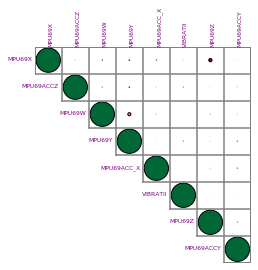

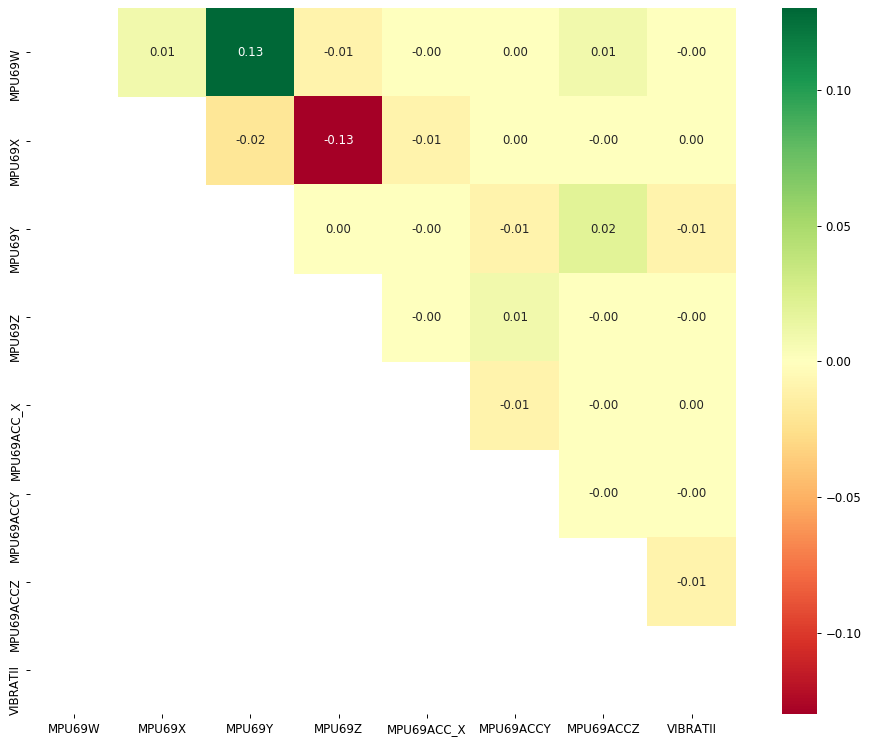

In [73]:
c=corrplot.Corrplot(df)
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=90, upper='circle',grid='grey',
       fontsize=6,label_color='purple',
       cmap='RdYlGn')
plt.show()

matplotlib.rcParams['figure.dpi'] = 85

# Calculate pairwise-correlation
matrix = df.corr().round(2)

# Create a mask
mask = np.tril(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)

plt.figure(figsize=(14, 11))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='RdYlGn')

plt.show()

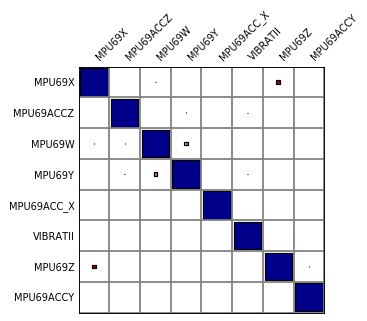

In [74]:
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=45)

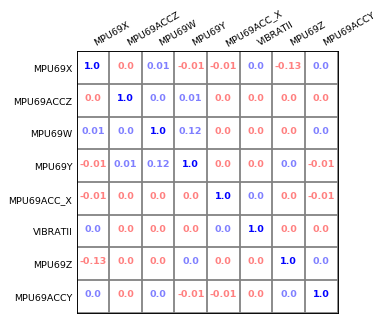

In [75]:
c.plot(method='text', fontsize=8, colorbar=False)
# only red to blue colormap is implemented so far

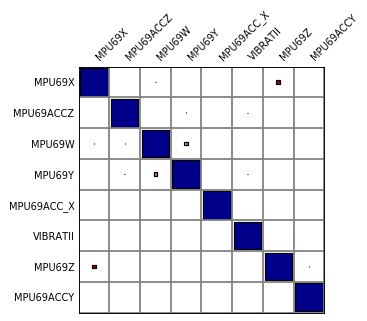

In [76]:
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=45)

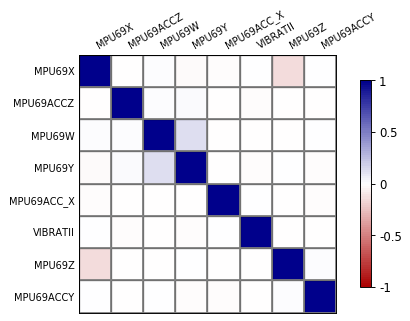

In [78]:
c.plot(method='color'); # shrink not available

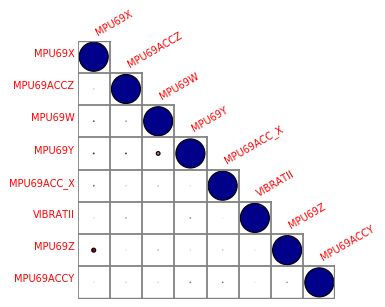

In [79]:
c.plot(colorbar=False, method='circle', shrink=.9, lower='circle',
       label_color='red'  );

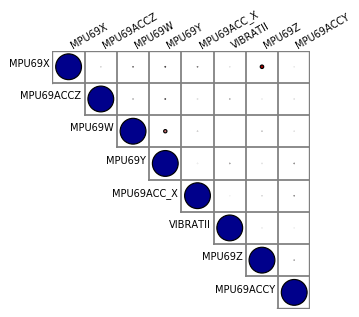

In [80]:
c.plot(colorbar=False, shrink=.8, upper='circle'  );

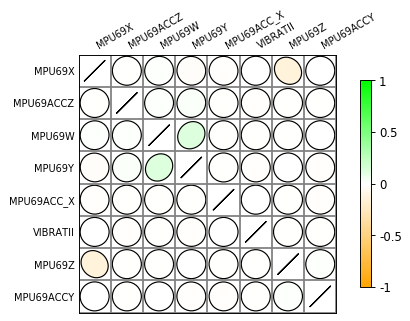

In [81]:
c.plot(cmap=('orange', 'white', 'green'));